# Data Cleaning 
In this notebook, I will discuss 'data cleaning' of a dataset using the Pandas library. As an example, I will work on the 'Churn Modelling' dataset to illustrate the process.

First, Lets load our data and import the needed libraries

In [1]:
#import the needed libraries 

import numpy as np
import pandas as pd

In [11]:
# load the 'churn modelling' dataset 
churn_df = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows of the dataset
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


## #1 Handling null values 

In [4]:
# check prescence of null values 
churn_df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

As shown in the previous output we have null values in the following coloumns :

Geography       >>   1

Age             >>   1

HasCrCard       >>   1

IsActiveMember  >>   1


There are various methods to deal with null values found 

1. remove rows with null values 

2. replace null values 

3. imputation (To be discussed later)

### #1. Remove rows with null values

In [5]:
# Let's try to remove the rows with null values
# check the shape of the dataset before and after the deletion to notice the difference
churn_df.shape

(10002, 14)

In [6]:
# now remove the null value 
no_null_churn = churn_df.dropna()
no_null_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check the size of the dataset again, you will notice that it will be less by 4 rows !
no_null_churn.shape

(9998, 14)

### #2 Replace null values 

In [8]:
# Let's try to replace the null values 
# check the shape of the dataset before and after the replacement 
churn_df.shape

(10002, 14)

In [9]:
# now replace the missing value with a number 
# for simplicity we will choose any random number (thats not actually the right way to do it, the value is better to be imputed to be more acurrate )

no_null_churn = churn_df.fillna(25)
no_null_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# check the size of the dataset again, you will notice that the size is not changed as we only replaced the null values 
no_null_churn.shape

(10002, 14)

instead of replacing the null values with a random value we could use the 'fillna()' method to fill forward of fill backward

In [13]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [12]:
# fill forward 
frw_fill_churn = churn_df.fillna(method='ffill')
frw_fill_churn.head (10)

C:\Users\HANIN\AppData\Local\Temp\ipykernel_14932\3783189185.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  frw_filled_churn = churn_df.fillna(method='ffill')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,0.0,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,Spain,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,0.0,74940.50,0
9,10,15592389,H?,684,France,Male,44.0,2,134603.88,1,1.0,1.0,71725.73,0


In [14]:
# fill backward
bck_fill_churn = churn_df.fillna(method='bfill')
bck_fill_churn.head(10)

C:\Users\HANIN\AppData\Local\Temp\ipykernel_14932\4272626907.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bck_fill_churn = churn_df.fillna(method='bfill')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,Germany,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,1.0,74940.50,0
9,10,15592389,H?,684,France,Male,31.0,2,134603.88,1,1.0,1.0,71725.73,0


Notice the difference on the previous dataset:

>> Before filling 
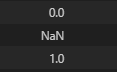

>> forward fill output 
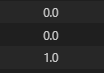

>> backward fill output 
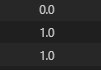

## #2 Handling duplicates 

In [25]:
# check for duplicates 
churn_df.duplicated().sum()


np.int64(2)

In [33]:
# show the duplicated rows
duplicated = churn_df.duplicated (keep = False)
churn_df [duplicated]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [34]:
# remove duplicates 
no_dup_churn = churn_df.drop_duplicates()
no_dup_churn.duplicated().sum()

np.int64(0)

In [35]:
no_dup_churn[duplicated]

C:\Users\HANIN\AppData\Local\Temp\ipykernel_14932\1276641679.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_dup_churn[duplicated]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


As we notice, there is no duplicated rows anymore

# THANK YOU

I hope you found it beneficial! Feel free to reach out with any comments or questions :>